In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

# AELIF Class

In [3]:
class AELIF:
    
    def __init__(self, no_fig, dt=0.1, u_rest=-70, u_reset=-75, u_spike=40 ,R=10, I_lst=[], tau_m=8, thresh=-50, delta=2, a=0.5, b=0.5, tau_w=100,
                 duration=20):
        self.fig = no_fig
        self.dt = 1
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.R = R
        self.tau_m = tau_m
        self.thresh = thresh
        self.delta = delta
        self.a = a
        self.b = b
        self.tau_w = tau_w
        self.duration = duration
        self.u_spike = u_spike
        self.w = []
        self.spike = []
        self.time = []
        self.current_lst = I_lst * np.ones(int(duration / dt))
        self.u = []
        for i in range(0, int(duration/dt), 1):
            self.time.append(i * dt)
            self.u.append(0)
            self.w.append(0)
        self.potential()
        return

    def calc_w(self, i):
        t_fire = -1
        if len(self.spike) >= 1:
            t_fire = self.spike[-1]
        diff = self.a * (self.u[i - 1] - self.u_rest) - self.w[i - 1] + self.b * self.tau_w * int(1 - np.sign(self.time[i - 1] - t_fire))
        tmp = diff / self.tau_w * self.dt
        self.w[i] = self.w[i-1] + tmp
        return

    
    def potential(self):
        self.u[0] = self.u_rest
        self.w[0] = 0
        for i in range(1, len(self.time)):
            self.calc_w(i)
            diff = -1 * (self.u[i - 1] - self.u_rest) + np.exp((self.u[i - 1] - self.thresh) / self.delta) * self.delta\
                   + self.R * self.current_lst[i] - self.R * self.w[i]
            tmp = diff / self.tau_m * self.dt + self.u[i - 1]
            if tmp >= self.thresh:
                self.u[i-1] = self.u_spike
                self.u[i] = self.u_reset
                self.spike.append(self.time[i])
            else:
                self.u[i] = tmp
        return
    
    def my_plot(self, bool_marker, no_fig, x_lst, y_lst, title, x_label, y_label, no_subplots, *args):
        plt.figure(figsize=(16,12))
        plt.figure(no_fig)
        plt.subplot(no_subplots, 1, 1, title=title, xlabel=x_label, ylabel=y_label)
        if bool_marker:
            plt.plot(x_lst, y_lst, marker='o')
        else:
            plt.plot(x_lst, y_lst)
        if no_subplots > 1:
            for i in range(no_subplots - 1):
                plt.subplot(no_subplots, 1, i+2, title=args[5*i + 2], xlabel=args[5*i + 3], ylabel=args[5*i +4])
                plt.plot(args[5*i+0], args[5*i + 1])
        return

    
    def plot(self):
        self.my_plot(False, self.fig, self.time, self.u, 'U - T', 'Time', 'Potential', 2, self.time, self.current_lst,
                'I - T', 'Time', 'Current')
        return
    
    @staticmethod
    def frequency():
        no_test = 800
        max_current = 8
        f = []
        for i in range(800):
            x = AELIF(1, 0.1, I_lst=i * max_current / no_test, duration=200)
            if (len(x.spike) > 1):
                f.append(1 / (x.spike[1] - x.spike[0]))
            elif (len(x.spike) == 1):
                f.append(1 / x.time[-1])
            else:
                f.append(0)
        plt.figure(figsize=(8,3))
        x.my_plot(False, 1, np.arange(0, max_current, max_current/no_test), f, 'F - I', 'Current', 'Frequency', 1)




# AELIF Frequency

<Figure size 1152x864 with 0 Axes>

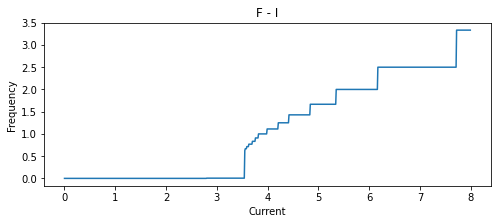

In [4]:
AELIF.frequency()

# Method 1

In [5]:
def sin_current(R ,tau_m ,tau_w ,a ,b):
    arr = np.empty(200)
    for i in range(200):
        arr[i] = (math.sin(1/5*i) + 1.1)*5
    x = AELIF(1, R=R, I_lst=arr, tau_m=tau_m, a=a, b=b, tau_w=tau_w,)
    x.plot()
    plt.figtext(0.45, 0.0, "I = (sin(t/5) + 1.1) * 5",fontsize=18)
    plt.figtext(0.2, -0.05, "v_rest=-70 , v_spike=40 , v_thresh=-50 , R="+str(R)+ ", tau_m="+str(tau_m)+", tau_w="+str(tau_w)+" , a="+str(a)+" , b="+str(b),fontsize=18)

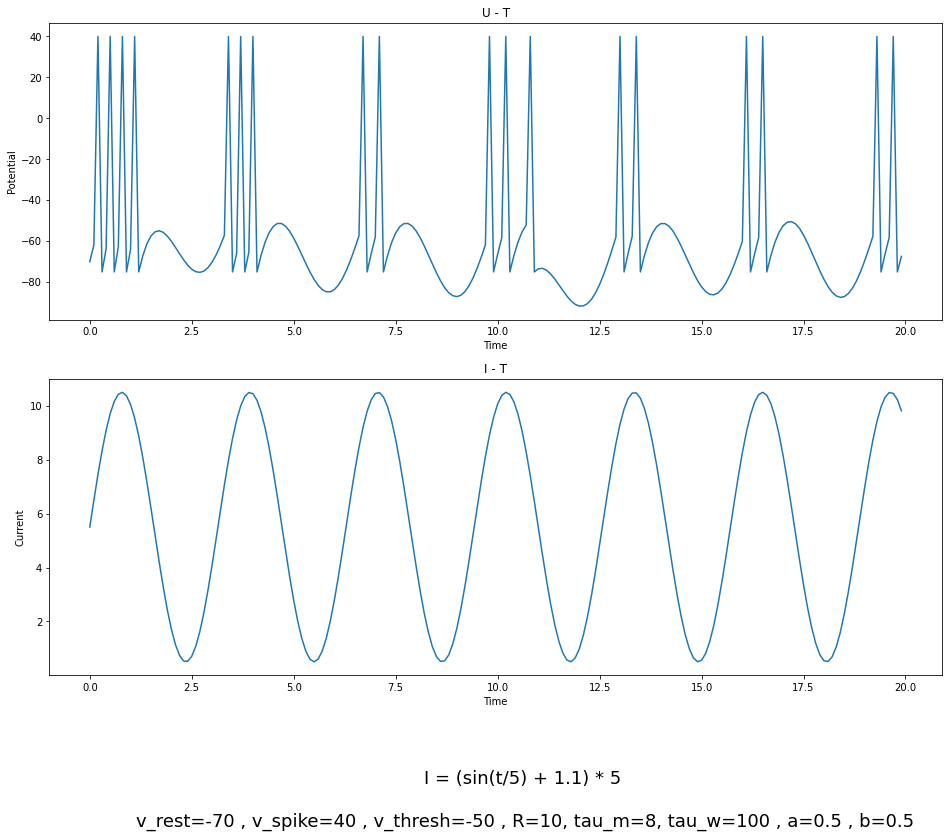

In [6]:
sin_current(R=10 ,tau_m=8 ,tau_w=100 ,a=0.5 ,b=0.5)

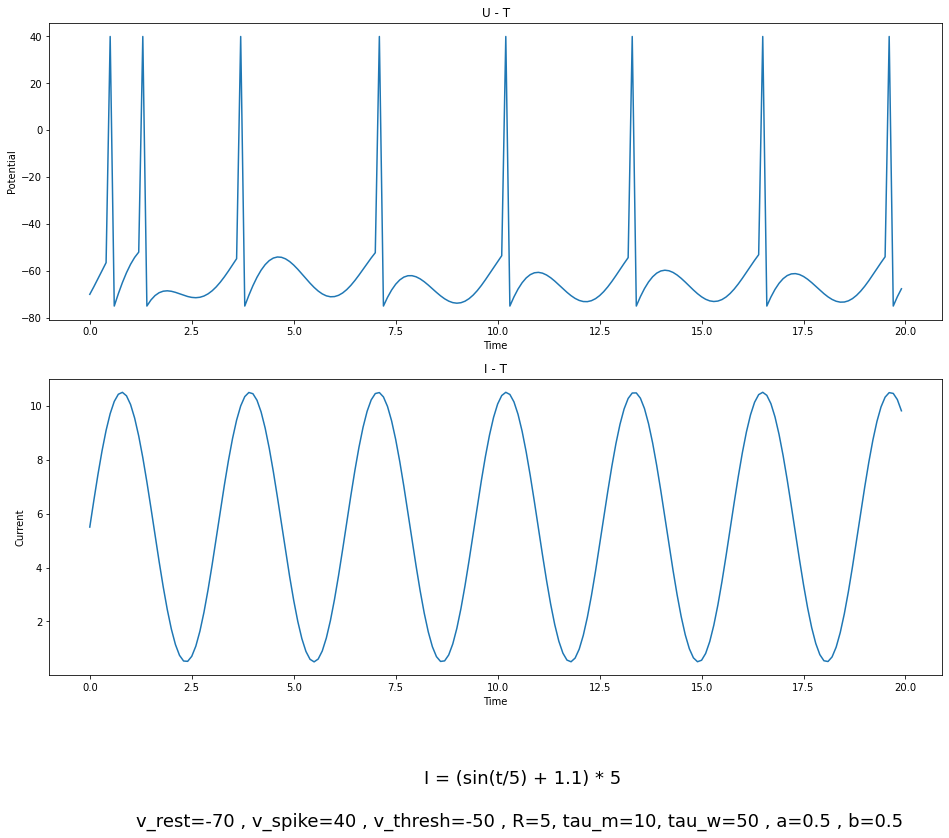

In [7]:
sin_current(R=5 ,tau_m=10 ,tau_w=50 ,a=0.5 ,b=0.5)

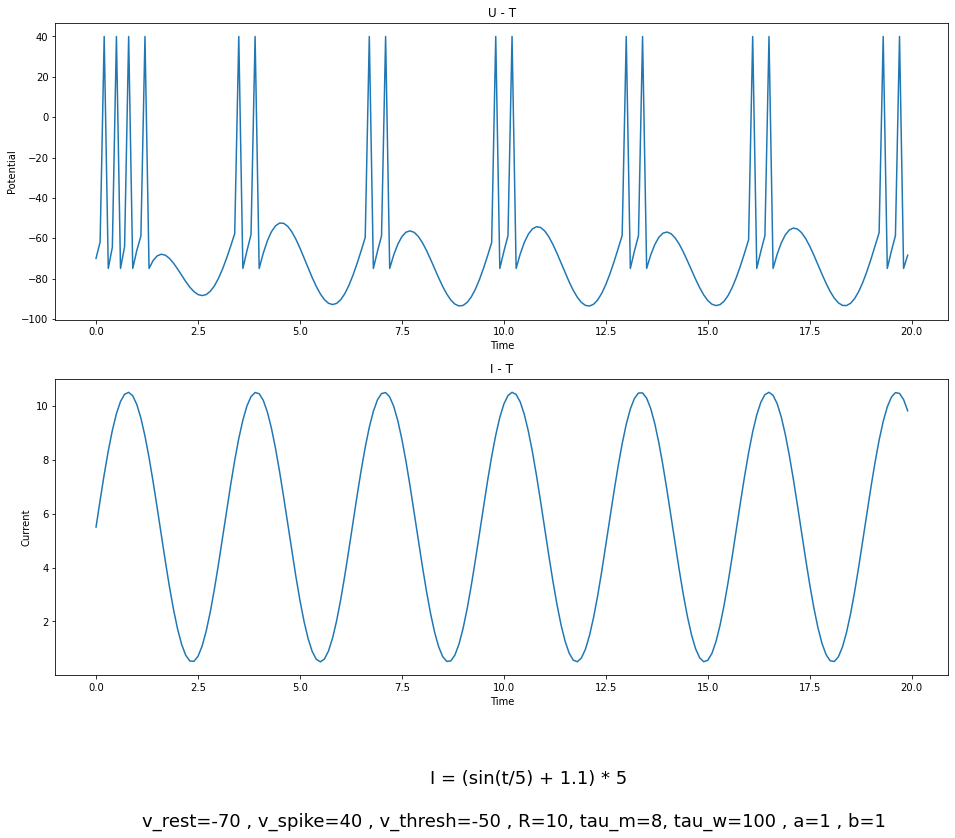

In [8]:
sin_current(R=10 ,tau_m=8 ,tau_w=100 ,a=1 ,b=1)

# Method 2

In [9]:
def log_current(R ,tau_m ,tau_w ,a ,b):
    arr = np.empty(200)
    for i in range(200):
        arr[i] = math.log(i + 1) + 5
    x = AELIF(1, 0.1, R=R, I_lst=arr, tau_m=tau_m, a=a, b=b, tau_w=tau_w,)
    x.plot()
    plt.figtext(0.45, 0.0, "I = log(t + 1) + 5",fontsize=18)
    plt.figtext(0.2, -0.05, "v_rest=-70 , v_spike=40 , v_thresh=-50 , R="+str(R)+ ", tau_m="+str(tau_m)+", tau_w="+str(tau_w)+" , a="+str(a)+" , b="+str(b),fontsize=18)

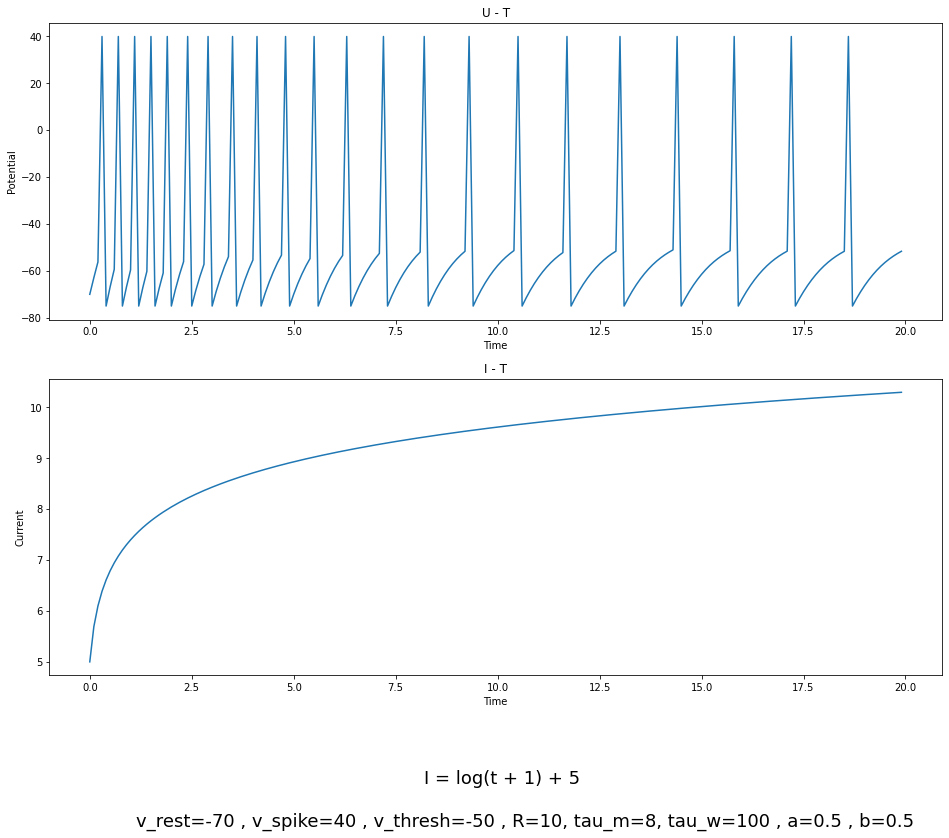

In [10]:
log_current(R=10 ,tau_m=8 ,tau_w=100 ,a=0.5 ,b=0.5)

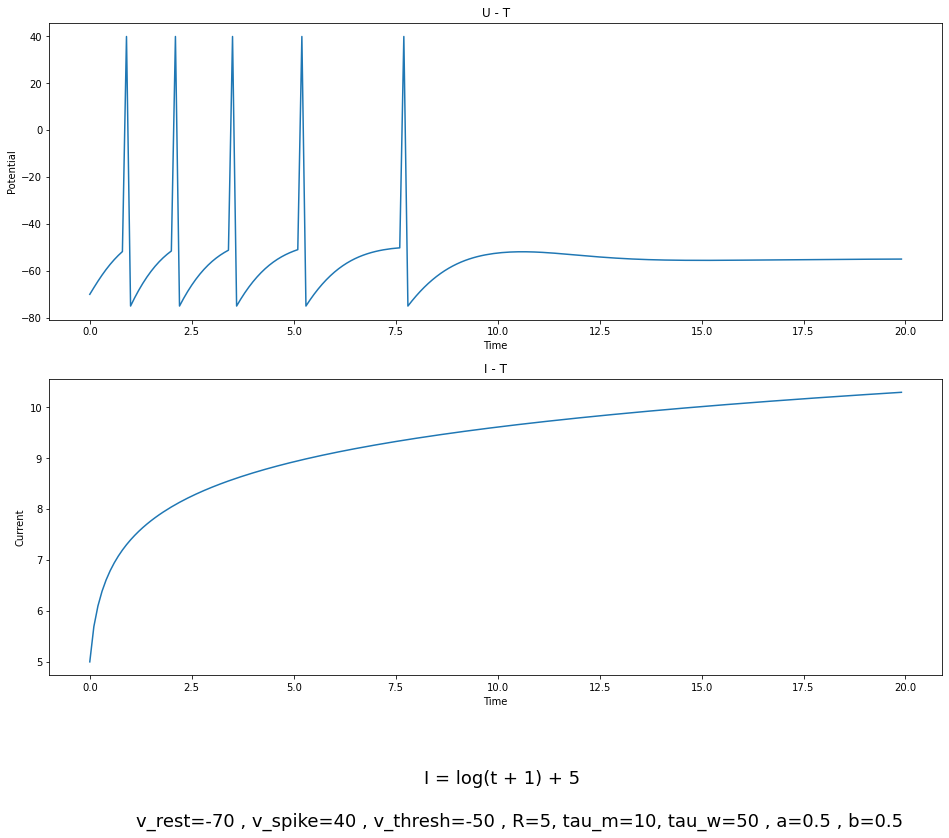

In [11]:
log_current(R=5 ,tau_m=10 ,tau_w=50 ,a=0.5 ,b=0.5)

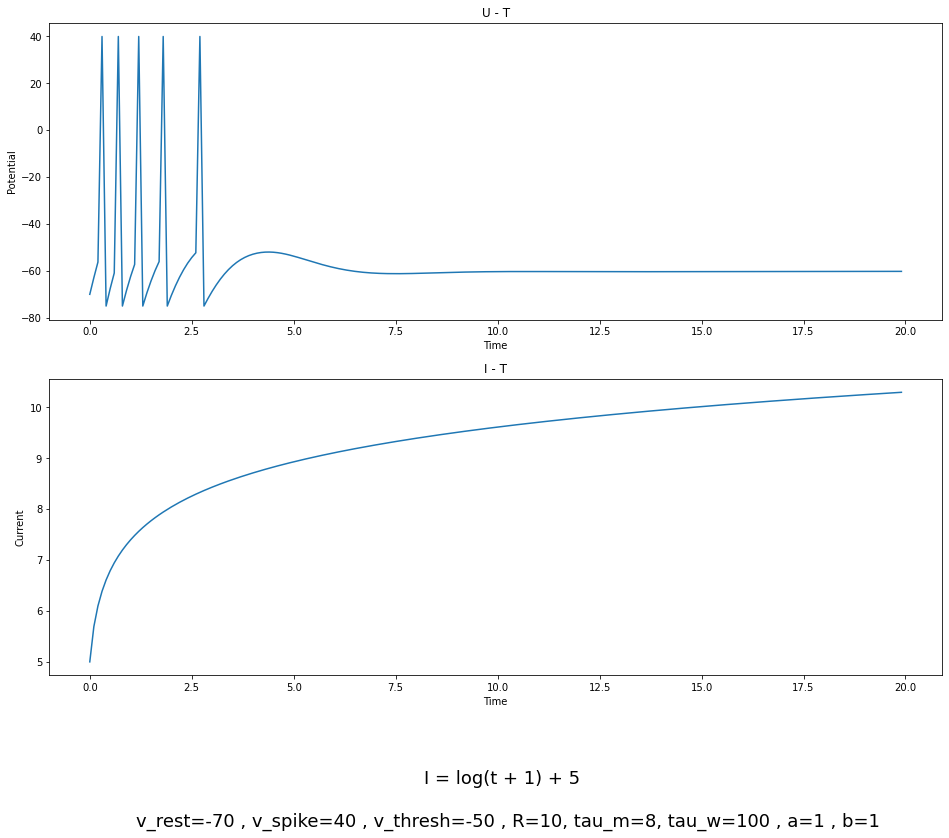

In [12]:
log_current(R=10 ,tau_m=8 ,tau_w=100 ,a=1 ,b=1)

# Method 3

In [13]:
def exp_current(R ,tau_m ,tau_w ,a ,b):
    arr = np.empty(200)
    for i in range(200):
        arr[i] = math.exp(i/150)+5
    x = AELIF(1, 0.1, R=R, I_lst=arr, tau_m=tau_m, a=a, b=b, tau_w=tau_w,)
    x.plot()
    plt.figtext(0.45, 0.0, "I = e^(t / 150) + 5",fontsize=18)
    plt.figtext(0.2, -0.05, "v_rest=-70 , v_spike=40 , v_thresh=-50 , R="+str(R)+ ", tau_m="+str(tau_m)+", tau_w="+str(tau_w)+" , a="+str(a)+" , b="+str(b),fontsize=18)

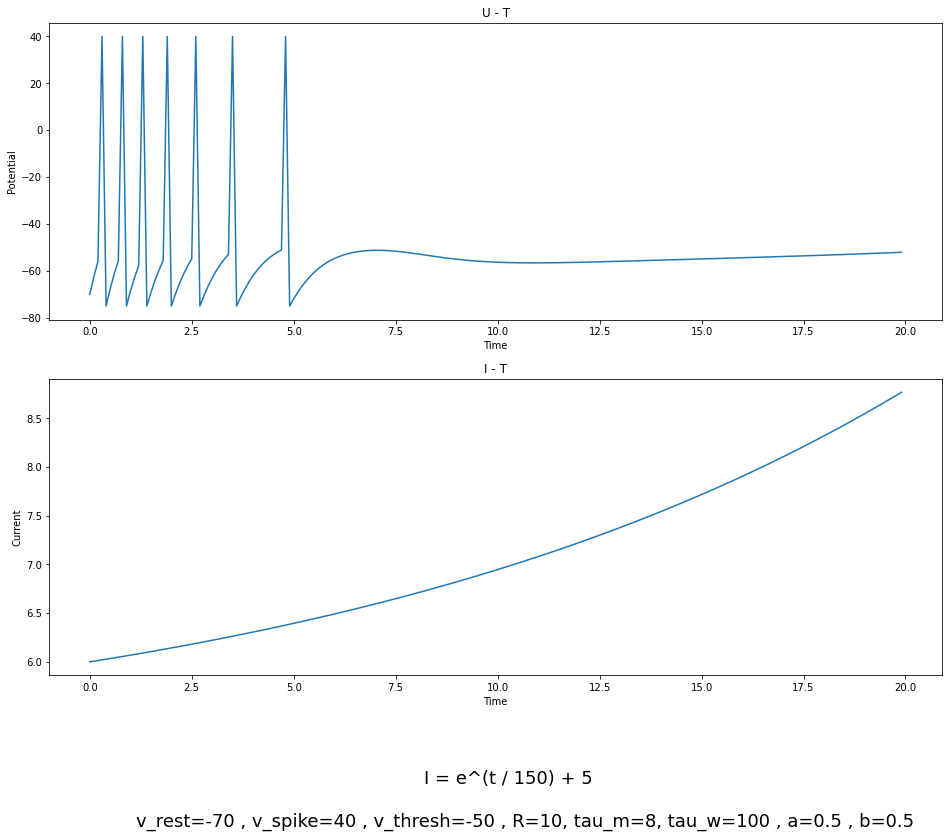

In [14]:
exp_current(R=10 ,tau_m=8 ,tau_w=100 ,a=0.5 ,b=0.5)

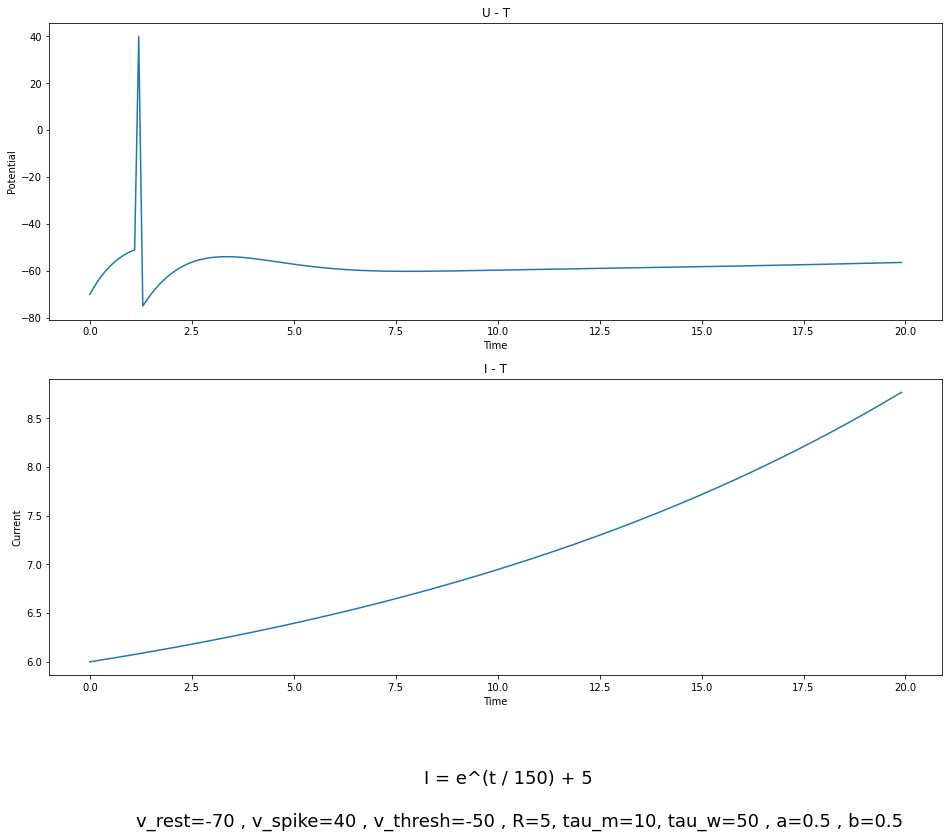

In [15]:
exp_current(R=5 ,tau_m=10 ,tau_w=50 ,a=0.5 ,b=0.5)

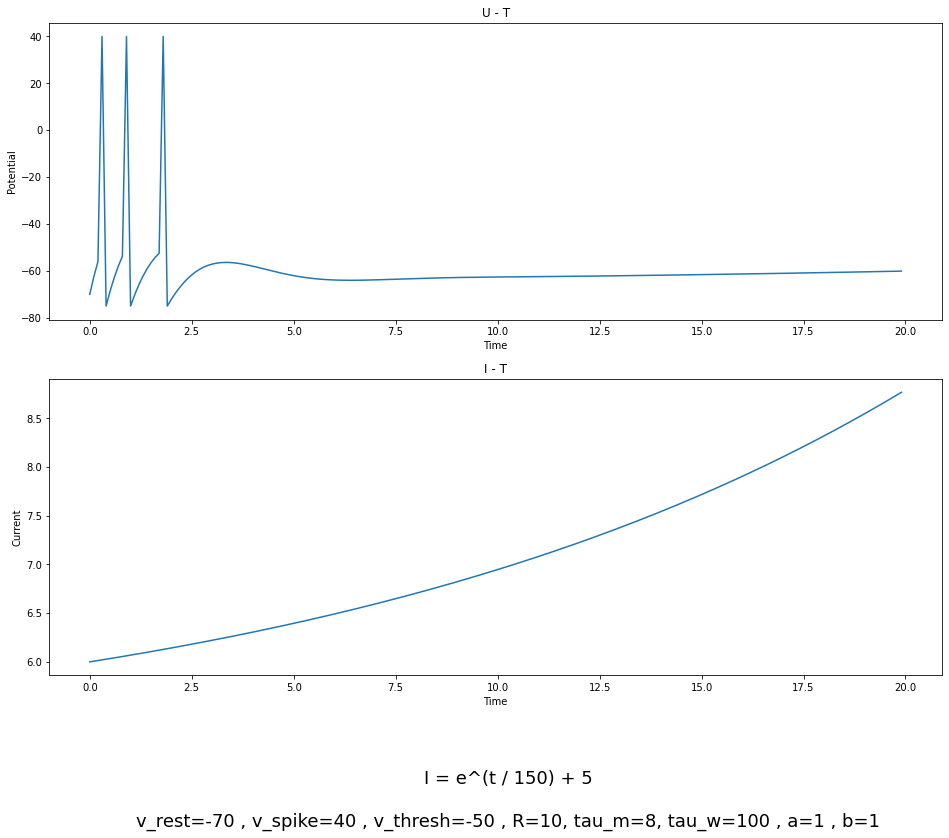

In [16]:
exp_current(R=10 ,tau_m=8 ,tau_w=100 ,a=1 ,b=1)

# Method 4

In [17]:
def const_current(R ,tau_m,tau_w ,a ,b):
    arr = np.ones(200) * 5
    x = AELIF(1, 0.1, R=R, I_lst=arr, tau_m=tau_m, a=a, b=b, tau_w=tau_w,)
    x.plot()
    plt.figtext(0.5, 0.0, "I = 5",fontsize=18)
    plt.figtext(0.2, -0.05, "v_rest=-70 , v_spike=40 , v_thresh=-50 , R="+str(R)+ ", tau_m="+str(tau_m)+", tau_w="+str(tau_w)+" , a="+str(a)+" , b="+str(b),fontsize=18)

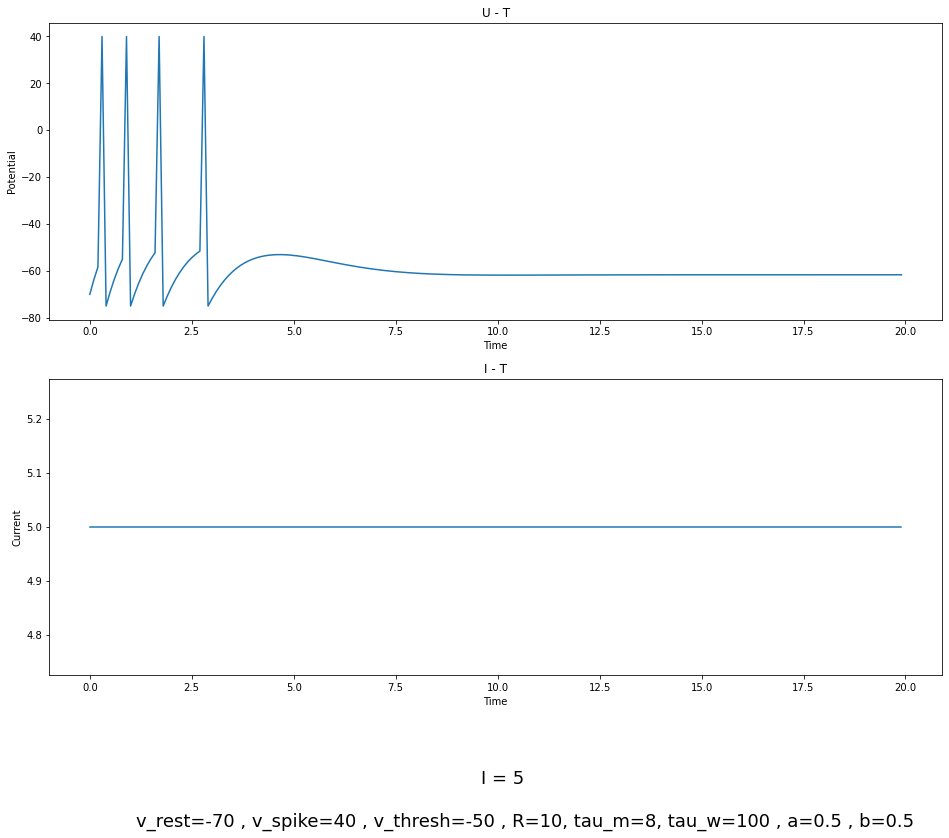

In [18]:
const_current(R=10 ,tau_m=8 ,tau_w=100 ,a=0.5 ,b=0.5)

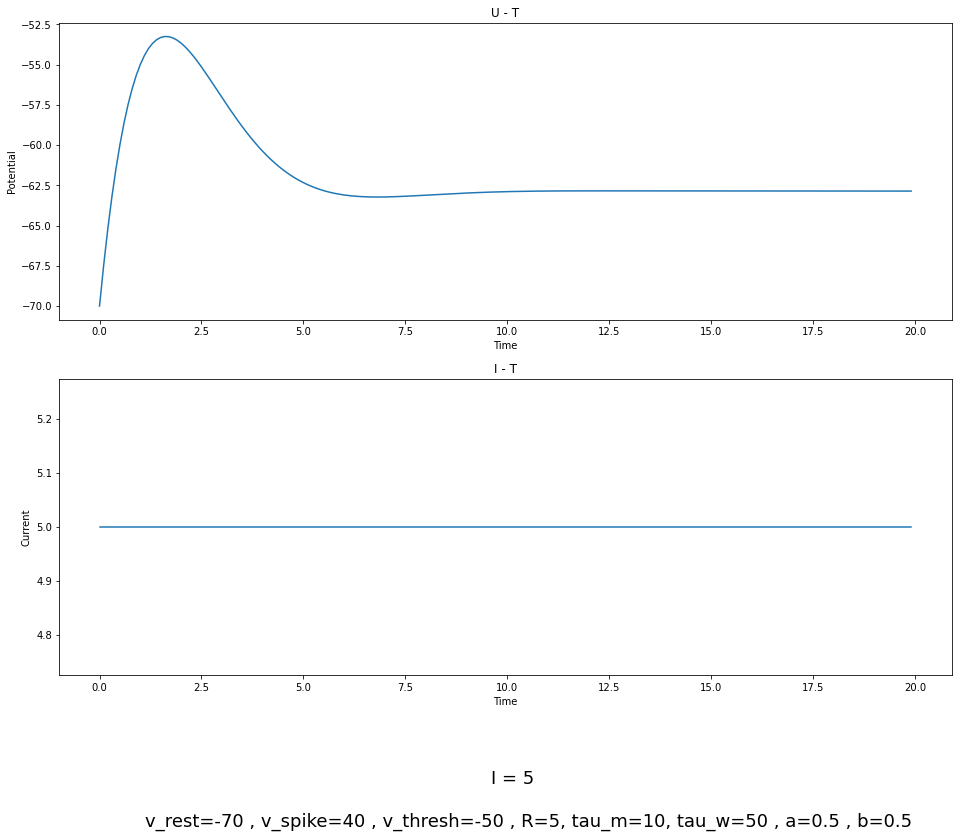

In [19]:
const_current(R=5 ,tau_m=10 ,tau_w=50 ,a=0.5 ,b=0.5)

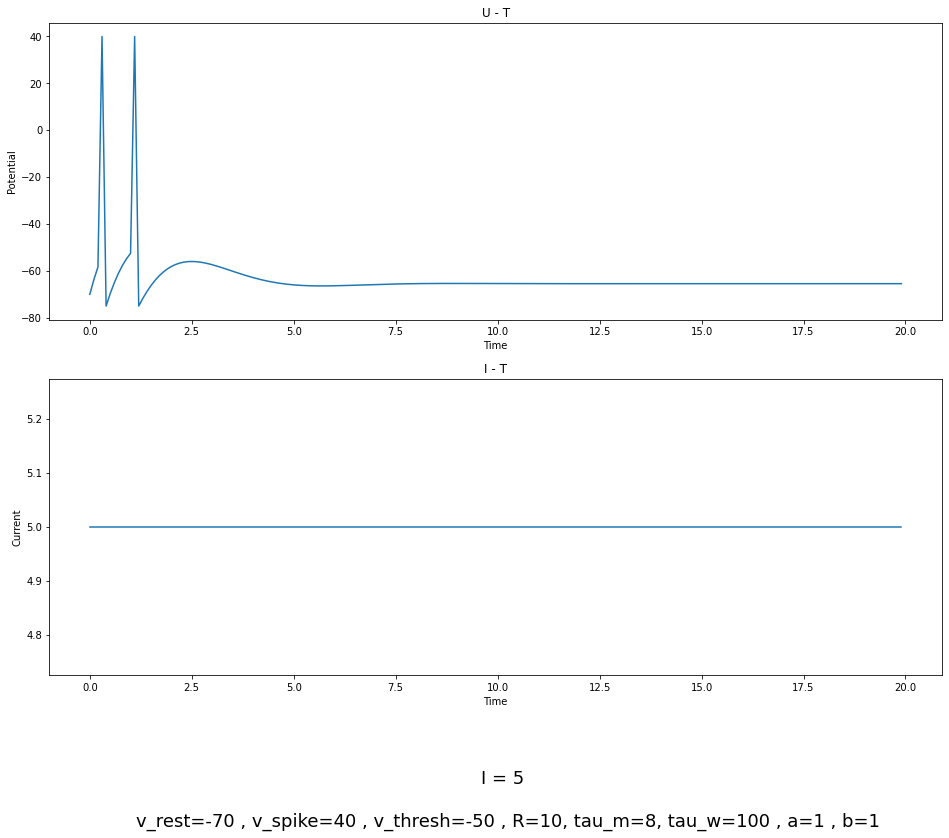

In [20]:
const_current(R=10 ,tau_m=8 ,tau_w=100 ,a=1 ,b=1)

# Method 5

In [21]:
def x2_current(R ,tau_m ,tau_w ,a ,b):
    arr = np.empty(200)
    for i in range(200):
        arr[i] = i*i/5000+4
    x = AELIF(1, 0.1, R=R, I_lst=arr, tau_m=tau_m, a=a, b=b, tau_w=tau_w,)
    x.plot()
    plt.figtext(0.45, 0.0, "I = (t^2 / 5000) + 4",fontsize=18)
    plt.figtext(0.2, -0.05, "v_rest=-70 , v_spike=40 , v_thresh=-50 , R="+str(R)+ ", tau_m="+str(tau_m)+", tau_w="+str(tau_w)+" , a="+str(a)+" , b="+str(b),fontsize=18)

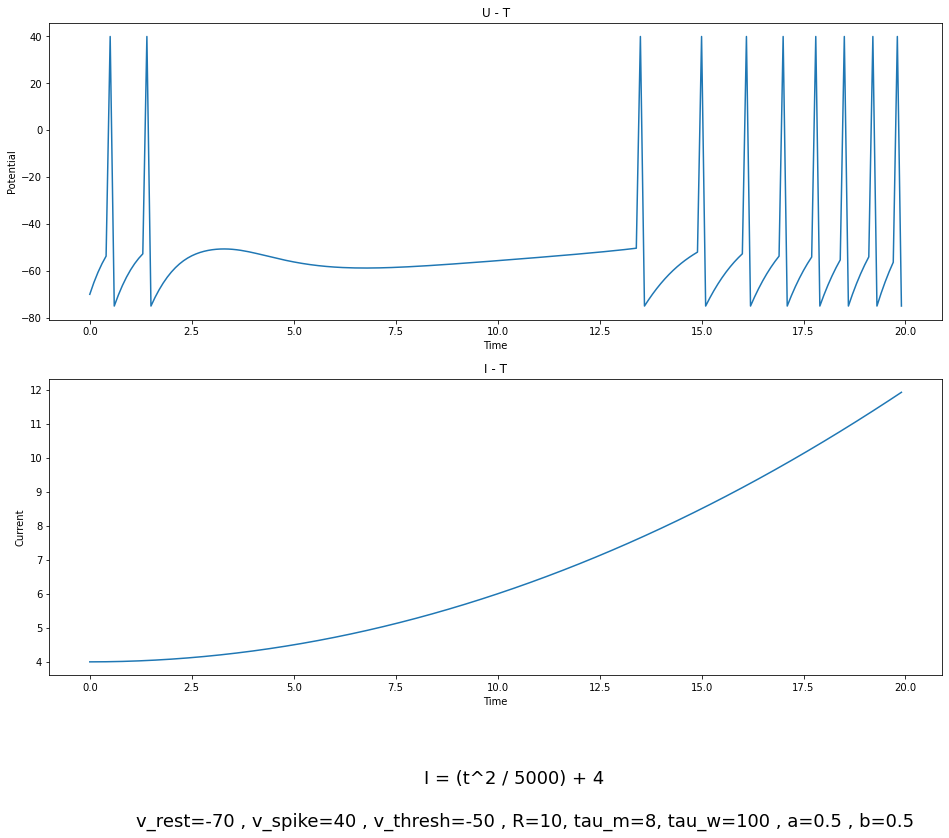

In [22]:
x2_current(R=10 ,tau_m=8 ,tau_w=100 ,a=0.5 ,b=0.5)

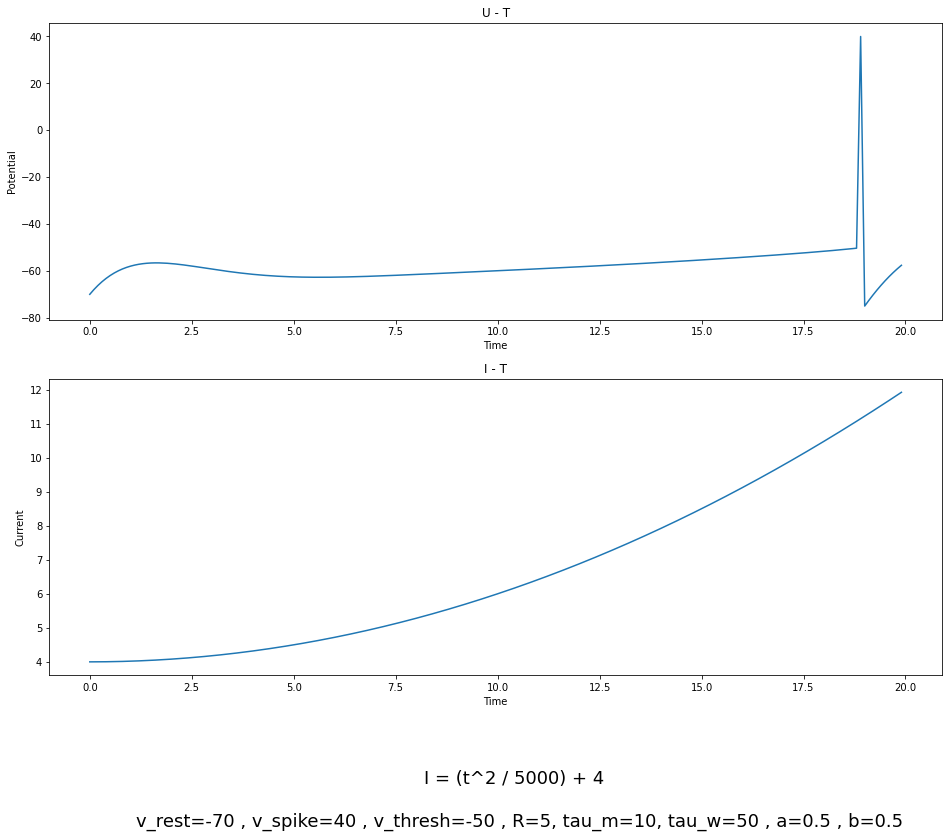

In [23]:
x2_current(R=5 ,tau_m=10 ,tau_w=50 ,a=0.5 ,b=0.5)

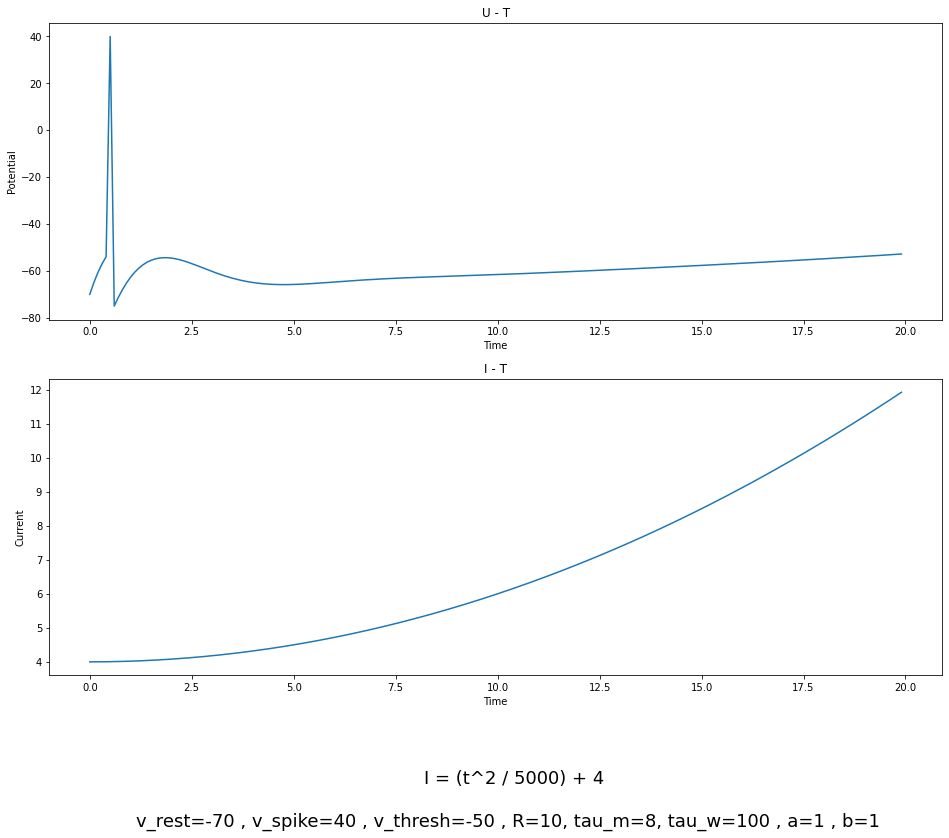

In [24]:
x2_current(R=10 ,tau_m=8 ,tau_w=100 ,a=1 ,b=1)